In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from google.colab import drive

In [7]:
f = open('/content/scrambled.mat')

for i in range(5):
    f.readline()

m = []

line = f.readline()
while line[1:]!='':
    val = int(line[1:])
    m.append(val)
    line = f.readline()

x = np.array(m)
mat = x.reshape(512,512).T

In [8]:
plt.imshow(mat)

In [9]:
class Energy:
    def __init__(self, image):
        self.image = image
        self.height = 4
        self.width = 4

    def getLeftRightEnergy(self, tile):
        try:
            i, j = tile
            x1 = 128 * i
            x2 = 128 * (i + 1)
            y = 128 * (j + 1) - 1
            diff = self.image[x1:x2,y] - self.image[x1:x2,y + 1]
            return np.sqrt((diff**2).mean())
        except IndexError:
            return 0

    def getUpDownEnergy(self, tile):
        try:
            i, j = tile
            y1 = 128 * j
            y2 = 128 * (j + 1)
            x = 128 * (i + 1) - 1
            diff = self.image[x, y1:y2] - self.image[x + 1, y1:y2]
            return np.sqrt((diff**2).mean())
        except IndexError:
            return 0

    def getEnergyAround(self, tile):
        i, j = tile
        e = np.zeros(4)
        e[0] = self.getLeftRightEnergy((i,j-1))
        e[1] = self.getLeftRightEnergy((i,j))
        e[2] = self.getUpDownEnergy((i-1,j))
        e[3] = self.getUpDownEnergy((i,j))
        return e.sum()

    def getEnergyAround2Tiles(self, t1, t2):
        return self.getEnergyAround(t1) + self.getEnergyAround(t2)

    def energy(self):
        energy = 0
        for i in range(1, self.height - 1):
            for j in range(1, self.width - 1):
                energy += self.getEnergyAround((i, j))
        return energy

In [10]:
e = Energy(image = mat)
e.energy()

1035.15508413872

1000
905.5926653975666


2000
805.268703000261


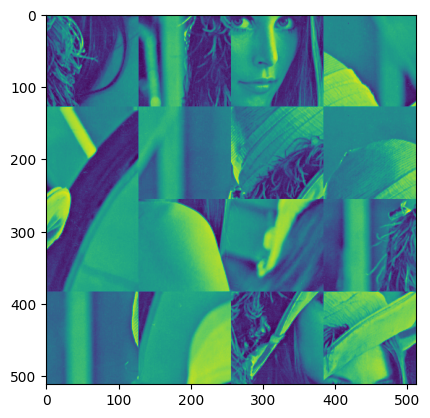

3000
899.2705720599877


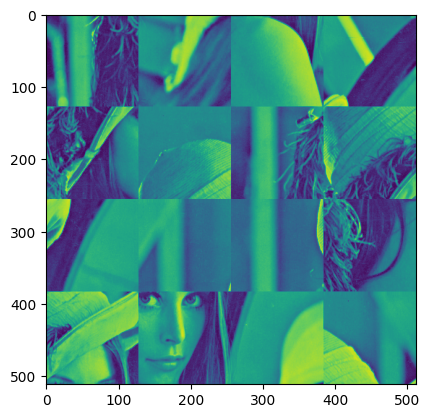

4000
1022.6388116635993


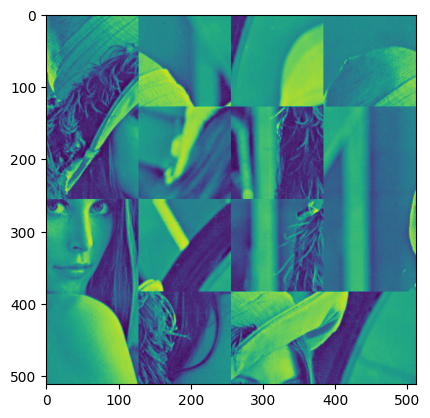

5000
898.8933355627825


6000
1100.7462533352386


7000
621.8842863722672


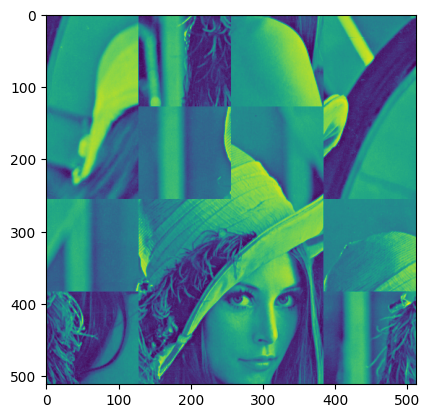

8000
370.00052977825925


9000
275.6847751169825


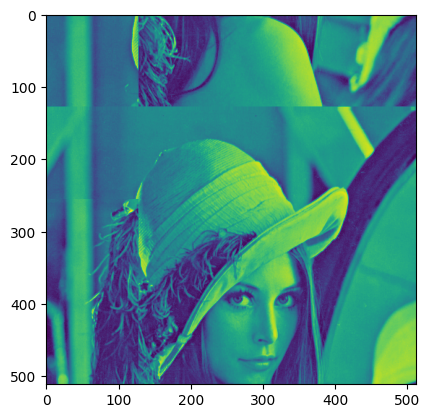

10000
275.6847751169825


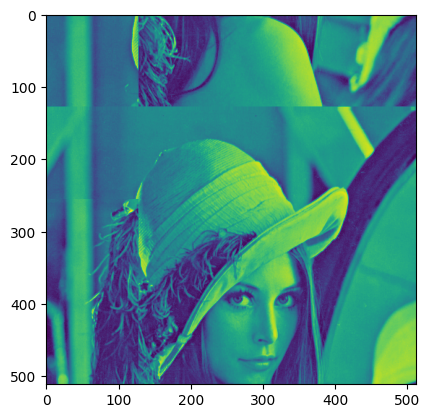

11000
275.6847751169825


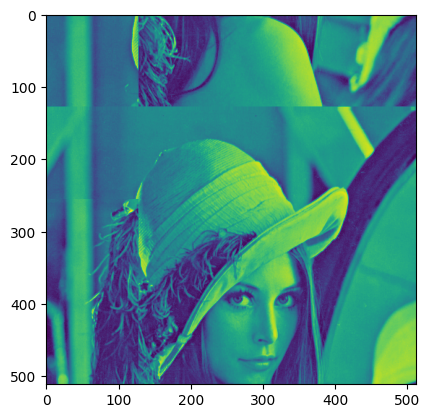

12000
275.6847751169825


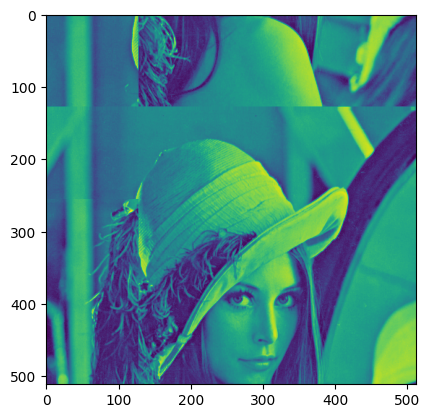

13000
275.6847751169825


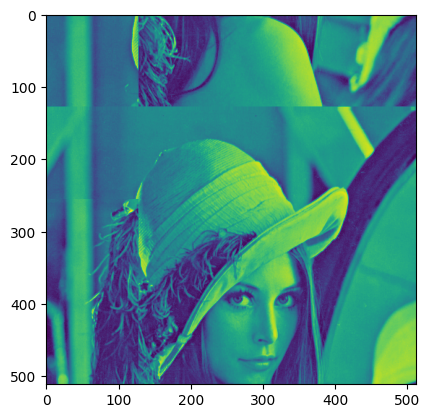

14000
275.6847751169825


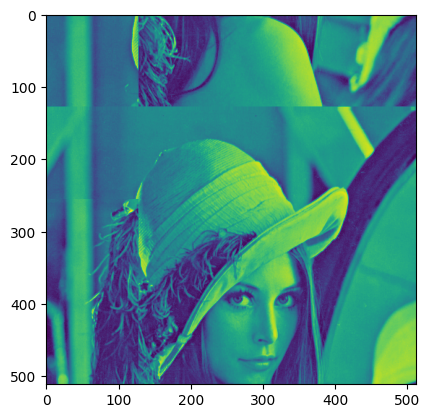

15000
275.6847751169825


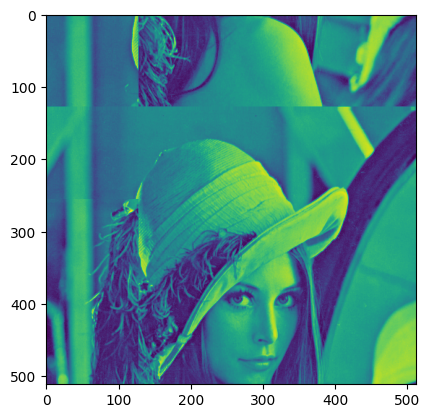

16000
275.6847751169825


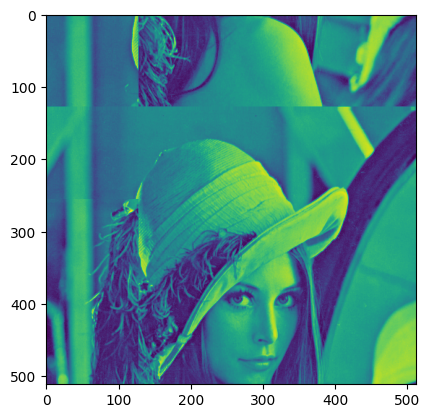

17000
275.6847751169825


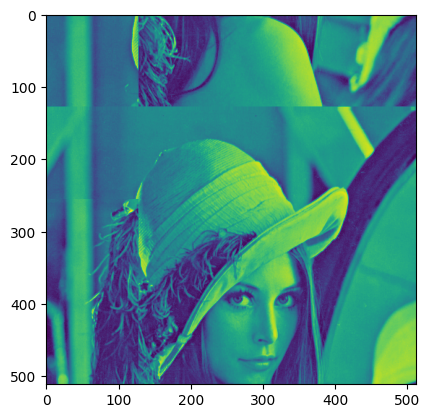

18000
275.6847751169825


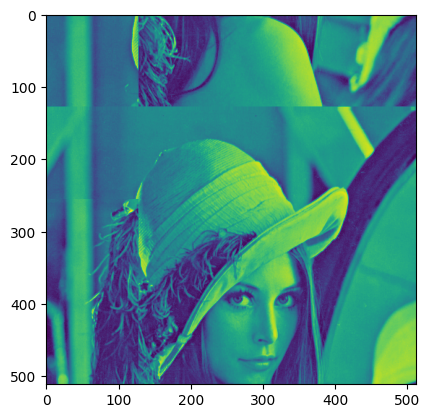

19000
275.6847751169825


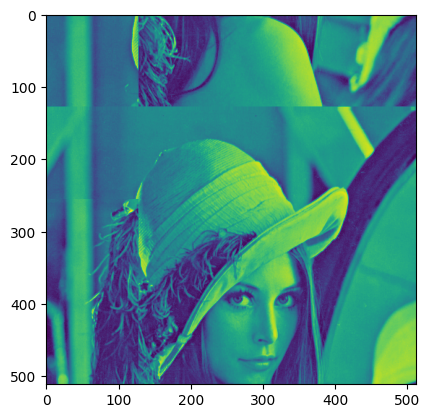

20000
275.6847751169825


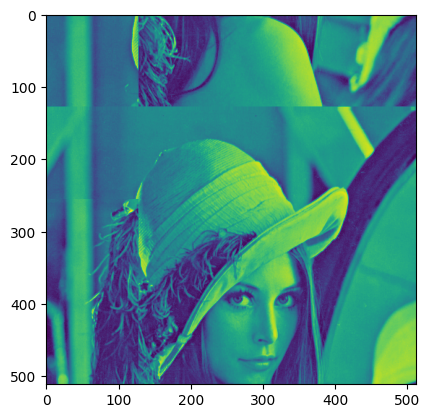

21000
275.6847751169825


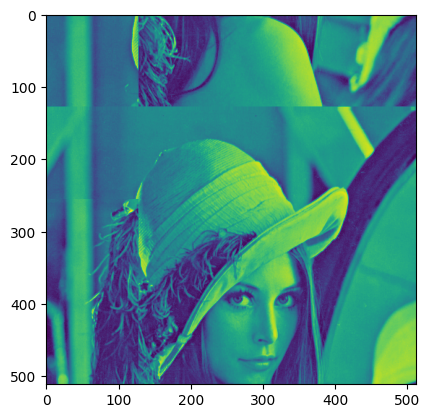

22000
275.6847751169825


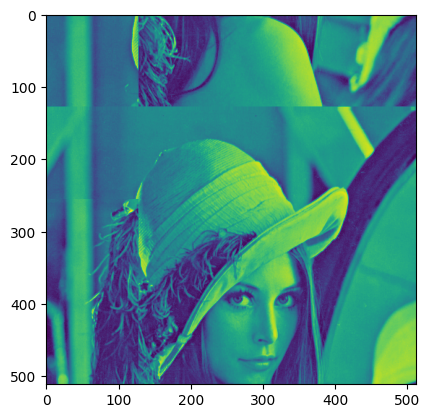

23000
275.6847751169825


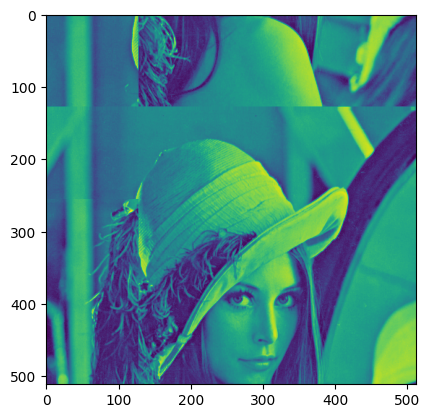

24000
275.6847751169825


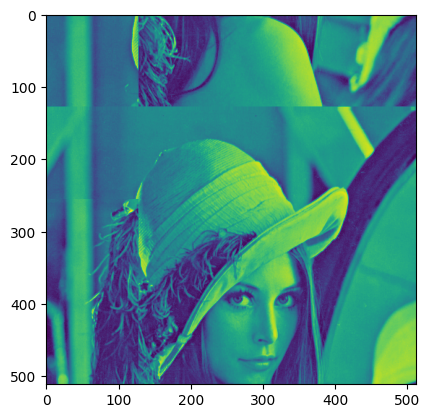

25000
275.6847751169825


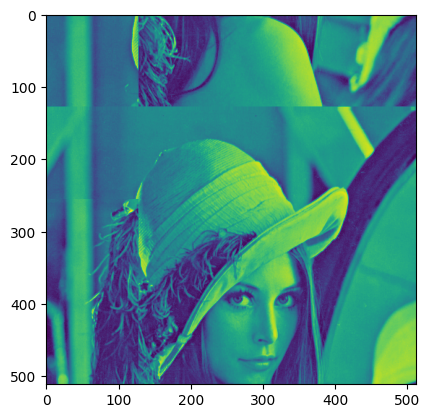

In [11]:
max_iter = 25000
temp = 1000
stop_temp = 0.00005
decay = 0.9995
x = np.arange(0,4)
y = np.arange(0,4)
curr_iter = 0
e = Energy(image = mat)
best_cost = e.energy()
best = mat
cost_list = []

while curr_iter!=max_iter and temp>=0:

    new = best.copy()
    np.random.shuffle(x)
    np.random.shuffle(y)

    cost_old = Energy(image=new).getEnergyAround2Tiles((x[0], y[0]), (x[1],y[1]))
    new[128*x[0]:128*x[0]+128, 128*y[0]:128*y[0]+128] = best[128*x[1]:128*x[1]+128, 128*y[1]:128*y[1]+128]
    new[128*x[1]:128*x[1]+128, 128*y[1]:128*y[1]+128] = best[128*x[0]:128*x[0]+128, 128*y[0]:128*y[0]+128]

    cost_new = Energy(image=new).getEnergyAround2Tiles((x[0], y[0]), (x[1],y[1]))

    if cost_new < cost_old:
        best = new
        best_cost = Energy(image=new).energy()

    elif np.random.rand()<np.exp(-abs(cost_old-cost_new)/temp):
        best = new
        best_cost = Energy(image=new).energy()

    temp = temp*decay
    curr_iter+=1
    cost_list.append(best_cost)

    if curr_iter%1000==0:
        print(curr_iter)
        print(best_cost)
        plt.imshow(best)
        plt.show()

In [12]:
plt.plot(cost_list)

In [13]:
cost_list[-10:]

[275.6847751169825,
 275.6847751169825,
 275.6847751169825,
 275.6847751169825,
 275.6847751169825,
 275.6847751169825,
 275.6847751169825,
 275.6847751169825,
 275.6847751169825,
 275.6847751169825]